In [1]:
include(joinpath("..","src","setup.jl"))
R"library(ggplot2)"

┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/AuditoryBistabilityLE/RqG8S.ji for AuditoryBistabilityLE [7e25a372-ade5-11e8-17af-a30e5a9e2c28]
└ @ Base loading.jl:1185


RObject{StrSxp}
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [6]:
params = Dict(
    :Δt         => 240ms,
    :Δf         => 3,
    :f          => 500Hz,

    :f_c_x      => 3.0,    :f_τ_x     => 500ms,
    :f_c_σ      => 0.1,    :f_τ_σ     => 500ms,
    :f_c_a      => 5,      :f_τ_a     => 3s,
    :f_c_m      => 100,    :f_τ_m     => 350ms,
    :f_W_m_σ    => 5.6,    :f_W_m_c   => 6.0,

    :s_c_x      => 3.0,    :s_τ_x     => 500ms,
    :s_c_σ      => 0.1,    :s_τ_σ     => 500ms,
    :s_c_a      => 5,      :s_τ_a     => 3s,
    :s_c_m      => 56,     :s_τ_m     => 350ms,
    :s_W_m_σ    => 15.0,   :s_W_m_c   => 6.0,

    :t_c_x      => 3.0,    :t_τ_x     => 500ms,
    :t_c_σ      => 0.1,    :t_τ_σ     => 500ms,
    :t_c_a      => 5,      :t_τ_a     => 3s,
    :t_c_m      => 32,     :t_τ_m     => 350ms,
    :t_W_m_σ_t  => 8.0,    :t_W_m_σ_ϕ => 6.0,
    :t_W_m_σ_N  => 3.0,    :t_W_m_c   => 6.0
)

Dict{Symbol,Number} with 35 entries:
  :s_W_m_σ   => 15.0
  :s_τ_x     => 500 ms
  :f_τ_m     => 350 ms
  :t_W_m_σ_N => 3.0
  :Δf        => 3
  :f_τ_x     => 500 ms
  :f_τ_σ     => 500 ms
  :t_τ_σ     => 500 ms
  :f_W_m_c   => 6.0
  :s_τ_a     => 3 s
  :s_W_m_c   => 6.0
  :t_τ_x     => 500 ms
  :t_c_σ     => 0.1
  :t_τ_m     => 350 ms
  :s_c_a     => 5
  :t_τ_a     => 3 s
  :t_W_m_σ_ϕ => 6.0
  :s_c_x     => 3.0
  :s_τ_m     => 350 ms
  :Δt        => 240 ms
  :s_c_σ     => 0.1
  :f_τ_a     => 3 s
  :s_c_m     => 56
  :f_c_σ     => 0.1
  :f_c_a     => 5
  ⋮          => ⋮

In [7]:
settings = TOML.parsefile(joinpath(srcdir,"settings.toml"))

Dict{AbstractString,Any} with 7 entries:
  "percept_lengths" => Dict{AbstractString,Any}("window_ms"=>500,"bandwidth_thr…
  "freqs"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "rates"           => Dict{AbstractString,Any}("rates_Hz"=>[2, 4, 8, 16, 32],"…
  "config"          => Dict{AbstractString,Any}()
  "scales"          => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "track"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "nmf"             => Dict{AbstractString,Any}("skipframes"=>0,"tol"=>0.001,"w…

# Test a short run in detail

In [9]:
result = []
for d in [1,3,6,12]
    @show d
    params[:Δf] = d
   push!(result,bistable_model(25,params,settings,progressbar=false,
                                intermediate_results=true))
end

alert()

d = 1
d = 3
d = 6
d = 12


Process(`osascript -e 'display notification "Done!" with title "Julia"'`, ProcessExited(0))

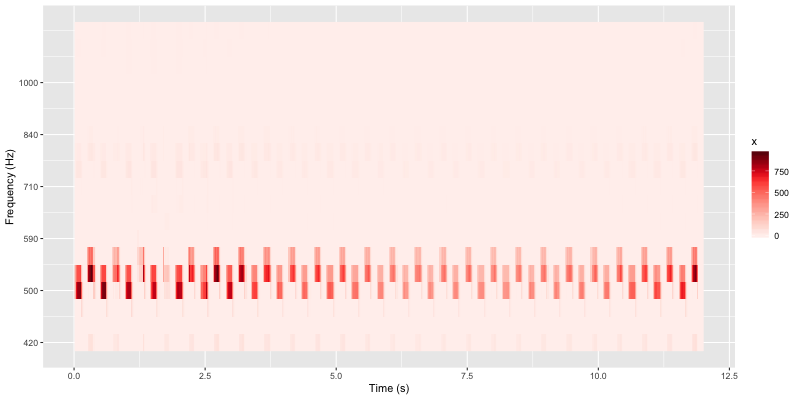

RObject{VecSxp}


In [15]:
rplot(result[1].primary_source)

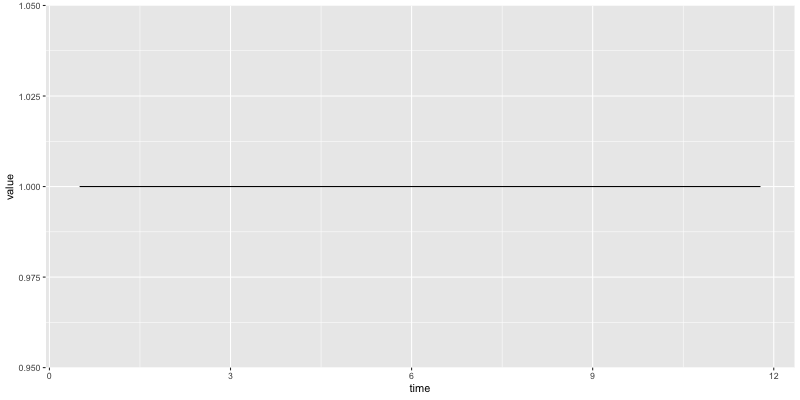

RObject{VecSxp}


In [20]:
rplot(result[1].percepts.bratio)

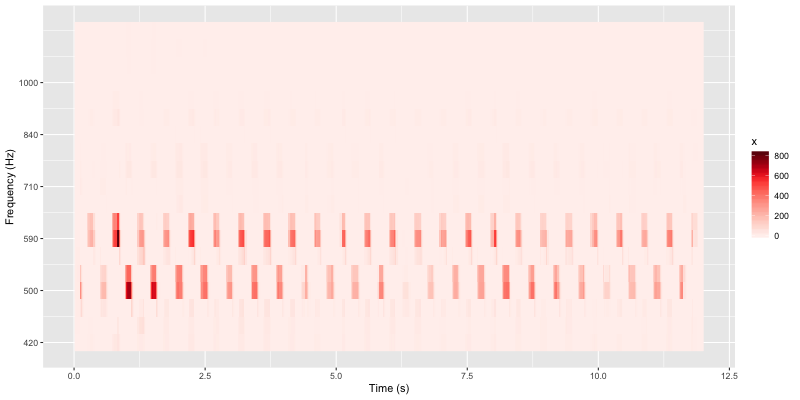

RObject{VecSxp}


In [16]:
rplot(result[2].primary_source)

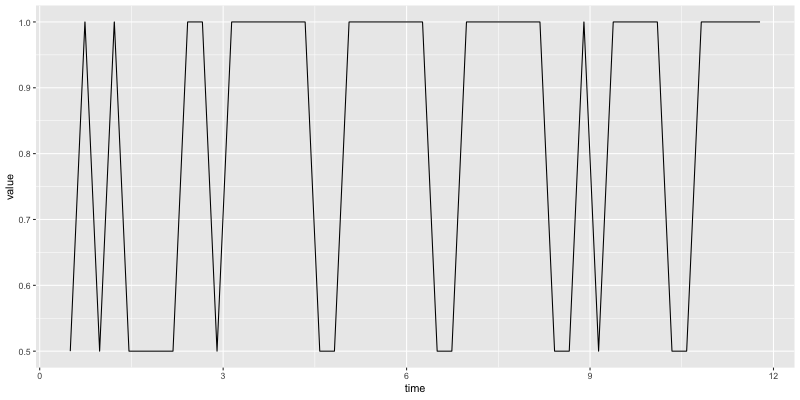

RObject{VecSxp}


In [21]:
rplot(result[2].percepts.bratio)

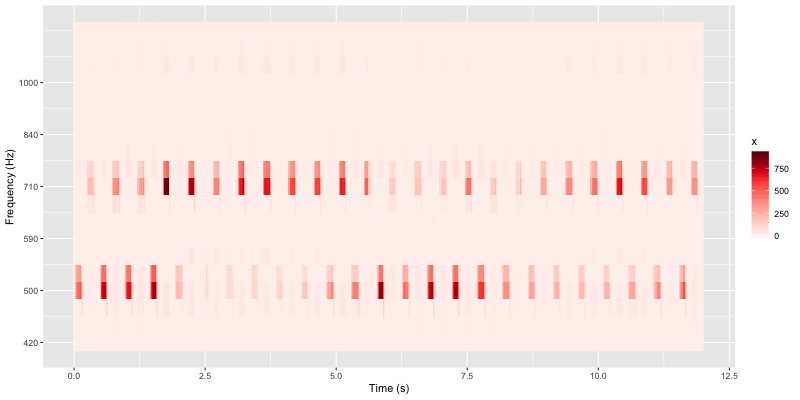

RObject{VecSxp}


In [17]:
rplot(result[3].primary_source)

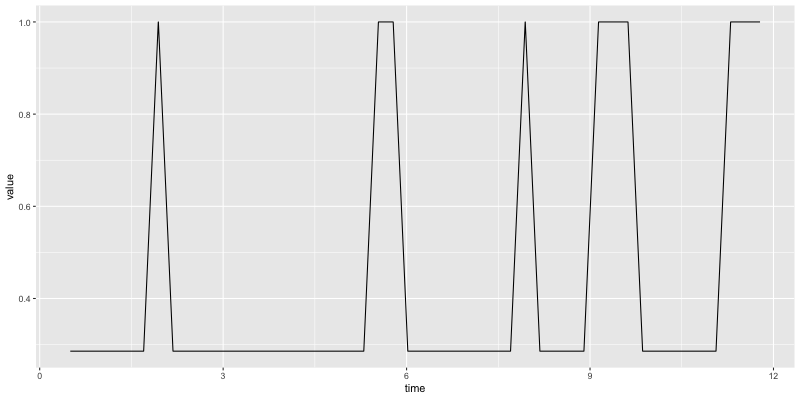

RObject{VecSxp}


In [22]:
rplot(result[3].percepts.bratio)

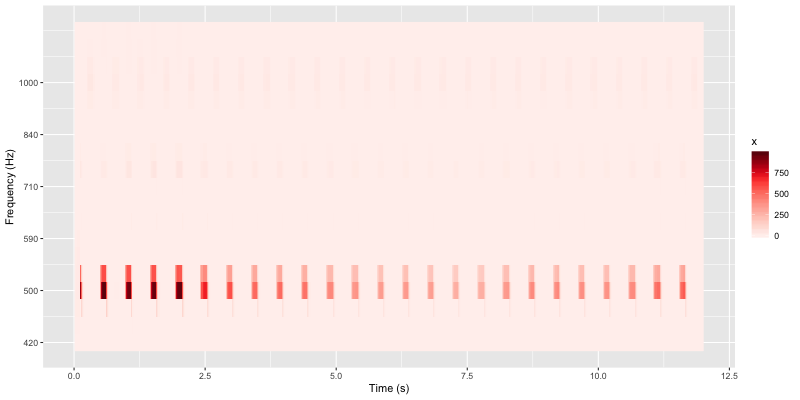

RObject{VecSxp}


In [18]:
rplot(result[4].primary_source)

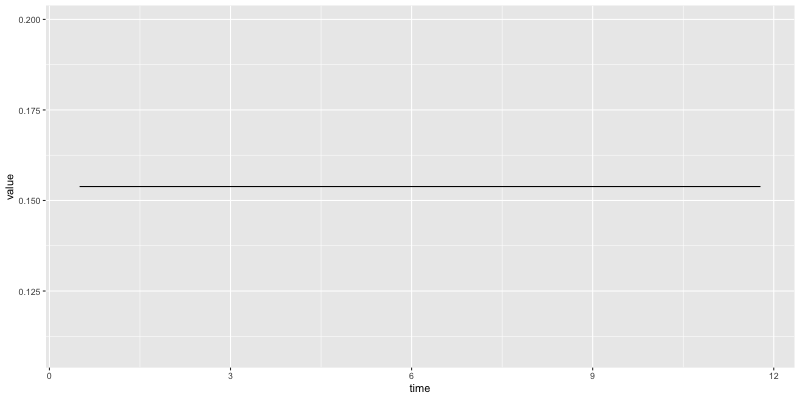

RObject{VecSxp}


In [23]:
rplot(result[4].percepts.bratio)

# Test a longer run with bratio

In [24]:
result = []
for d in [3,6,12]
    @show d
    params[:Δf] = d
   push!(result,bistable_model(100,params,settings,progressbar=false,
                               intermediate_results=true))
end

alert()

d = 3
d = 6
d = 12


Process(`osascript -e 'display notification "Done!" with title "Julia"'`, ProcessExited(0))

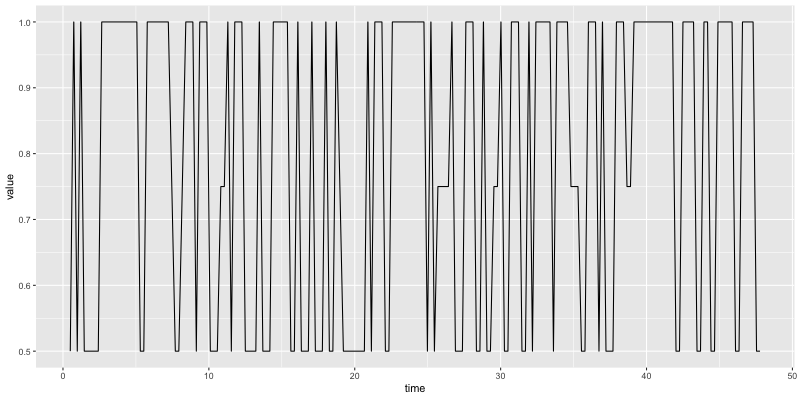

RObject{VecSxp}


In [26]:
rplot(result[1].percepts.bratio)

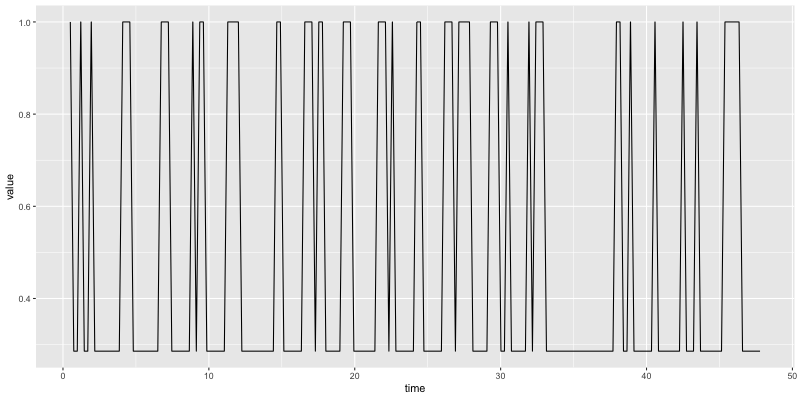

RObject{VecSxp}


In [27]:
rplot(result[2].percepts.bratio)

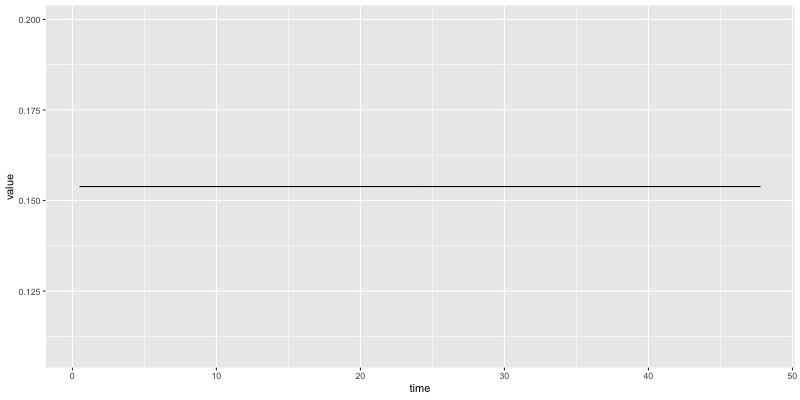

RObject{VecSxp}


In [28]:
rplot(result[3].percepts.bratio)

# look in detail at the model

In [42]:
params[:Δf] = 6
result = bistable_model(25, params, settings, progressbar=false, intermediate_results=true);

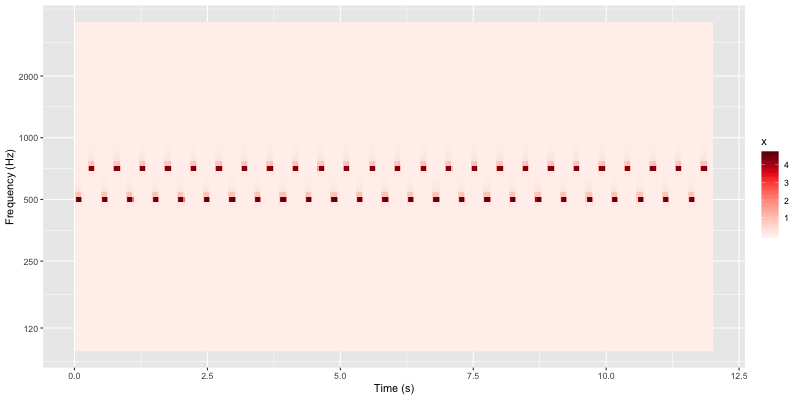

RObject{VecSxp}


In [43]:
rplot(result.spect.inweights)

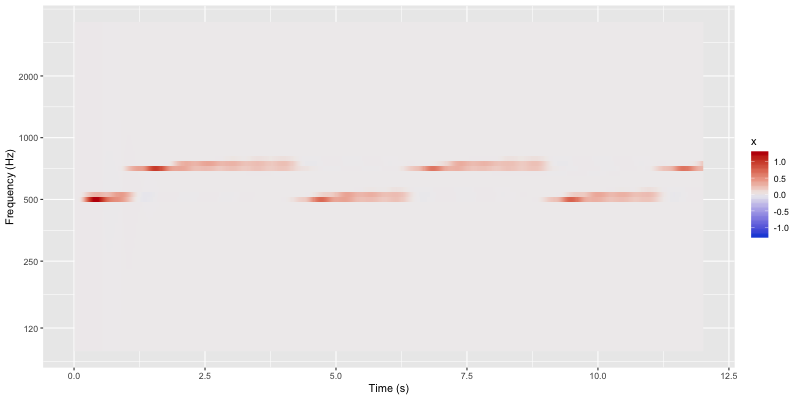

RObject{VecSxp}


In [44]:
rplot(result.spect.outweights)

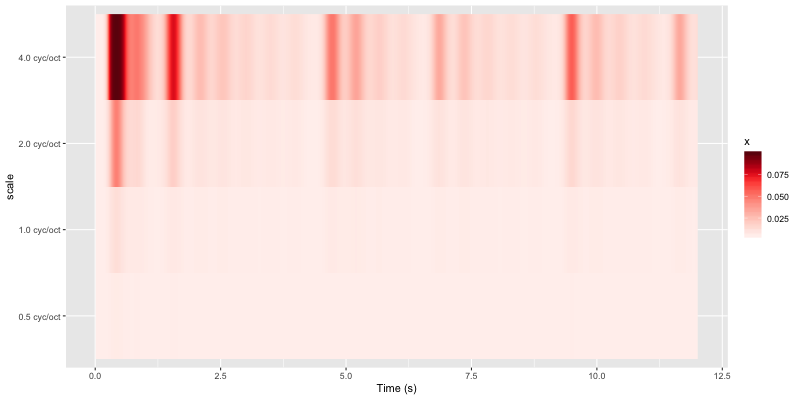

RObject{VecSxp}


In [45]:
rplot(result.cortical.inweights)

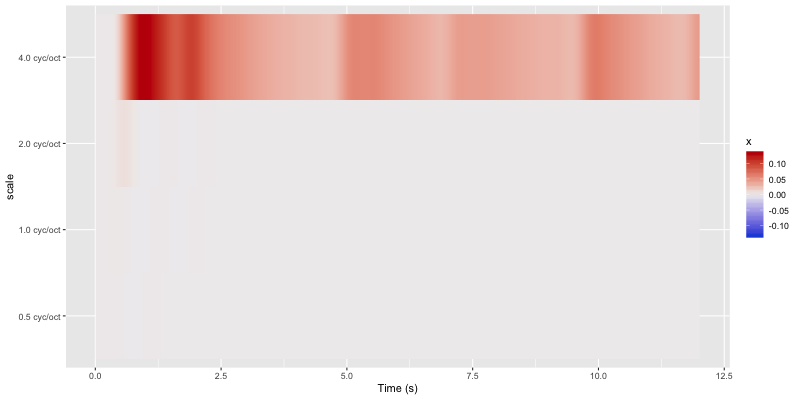

RObject{VecSxp}


In [46]:
rplot(result.cortical.outweights)

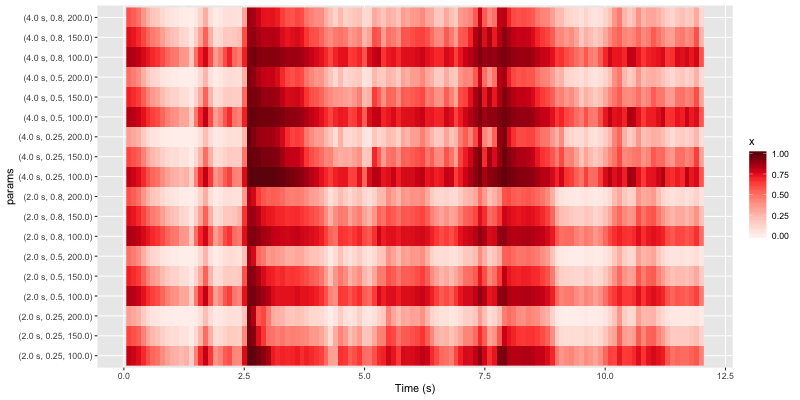

RObject{VecSxp}


In [47]:
rplot(result.sources.inweights)

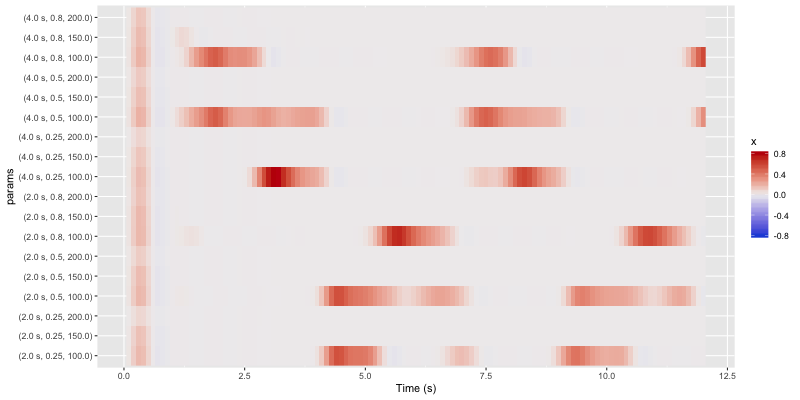

RObject{VecSxp}


In [48]:
rplot(result.sources.outweights)

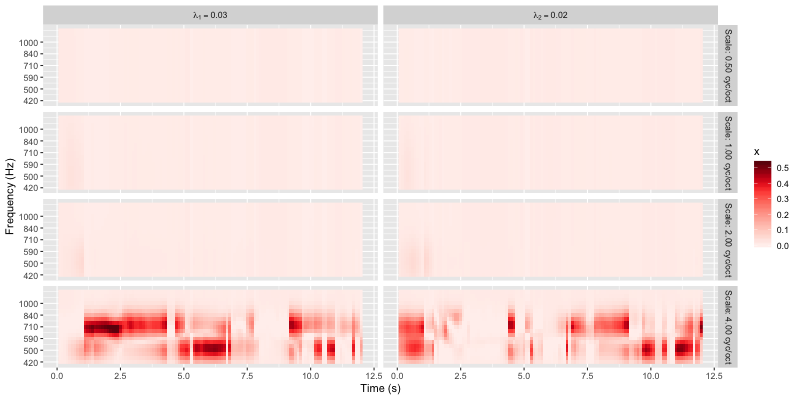

RObject{VecSxp}


In [50]:
rplot(result.sources.tracks[1])

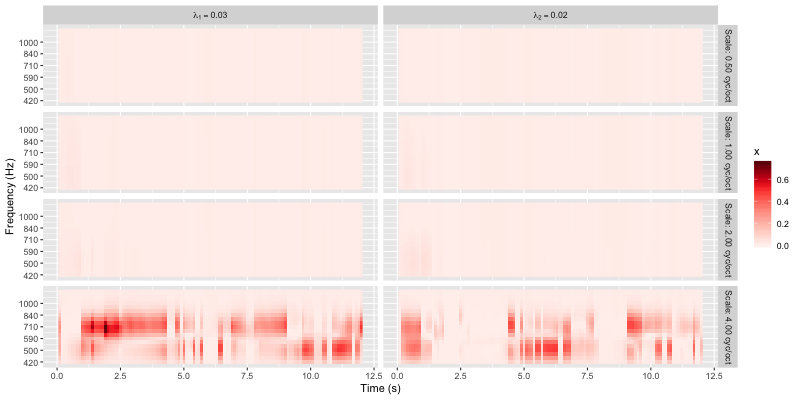

RObject{VecSxp}


In [53]:
rplot(result.sources.tracks[8])

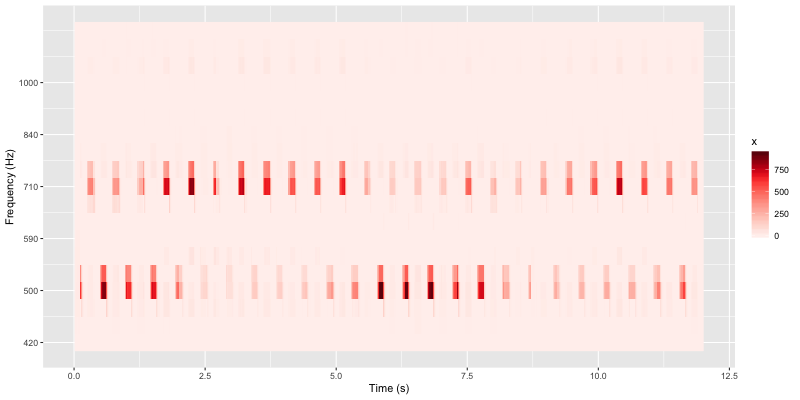

RObject{VecSxp}


In [40]:
rplot(result.primary_source)

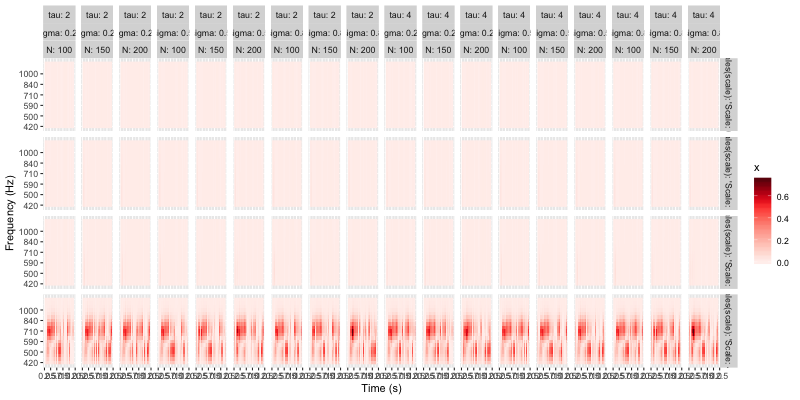

RObject{VecSxp}


In [49]:
rplot(result.sources.tracks)

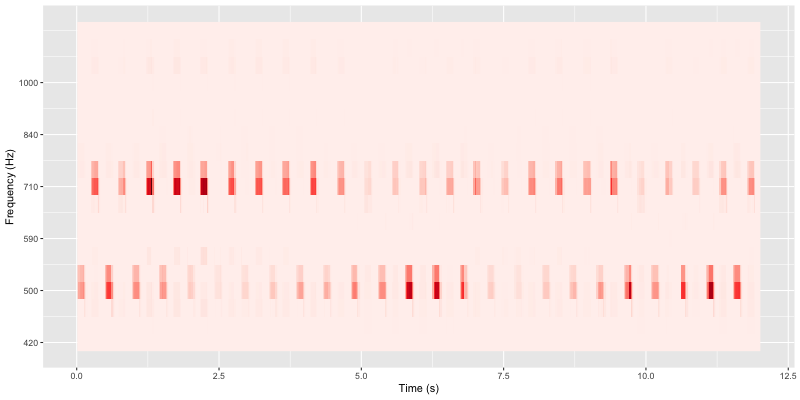

RObject{VecSxp}


In [54]:
p = rplot(result.primary_source)
R"$p + theme(legend.position='none')"

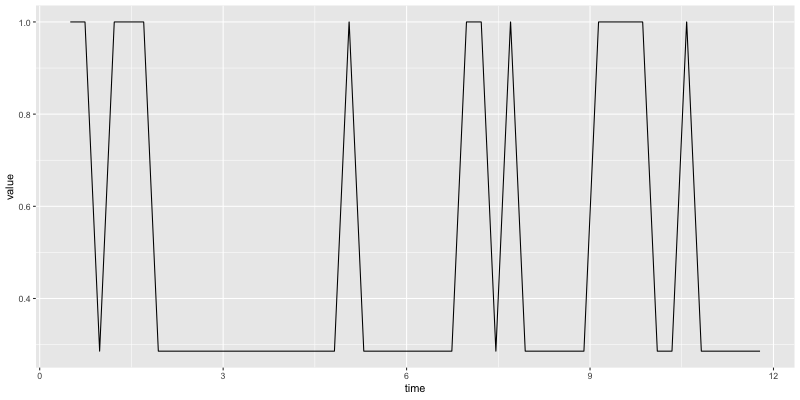

RObject{VecSxp}


In [52]:
rplot(result.percepts.bratio)